In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
day = pd.read_csv('data/day.csv') # import the csv file
day.index = day["instant"] # map the instant column to index
day.index.name = 'i'
day = day.drop(columns=["instant"]) # drop the instant column as its now redundant
day["datetime"] = pd.to_datetime(day['dteday']) #what is this line for exactly
day = day.drop(columns=["dteday"])
day = day.drop(columns=["yr"])
day = day.drop(columns=["mnth"])
day['year'] = day['datetime'].dt.year
day['month'] = day['datetime'].dt.month
day['weekday'] = day['datetime'].dt.weekday
order = ['datetime', 'workingday','cnt', 'registered', 'casual', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'weekday', 'month', 'year', 'holiday'] #year
day = day[order]

In [5]:
day.head()

,datetime,workingday,cnt,registered,casual,weathersit,temp,atemp,hum,windspeed,weekday,month,year,holiday
i,,,,,,,,,,,,,,
1,2011-01-01,0,985,654,331,2,0.344167,0.363625,0.805833,0.160446,5,1,2011,0
2,2011-01-02,0,801,670,131,2,0.363478,0.353739,0.696087,0.248539,6,1,2011,0
3,2011-01-03,1,1349,1229,120,1,0.196364,0.189405,0.437273,0.248309,0,1,2011,0
4,2011-01-04,1,1562,1454,108,1,0.200000,0.212122,0.590435,0.160296,1,1,2011,0
5,2011-01-05,1,1600,1518,82,1,0.226957,0.229270,0.436957,0.186900,2,1,2011,0


In [6]:
day.describe()

,datetime,workingday,cnt,registered,casual,weathersit,temp,atemp,hum,windspeed,weekday,month,year,holiday
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.683995,4504.348837,3656.172367,848.176471,1.395349,0.495385,0.474354,0.627894,0.190486,3.002736,6.519836,2011.500684,0.028728
min,2011-01-01 00:00:00,0.000000,22.000000,20.000000,2.000000,1.000000,0.059130,0.079070,0.000000,0.022392,0.000000,1.000000,2011.000000,0.000000
25%,2011-07-02 12:00:00,0.000000,3152.000000,2497.000000,315.500000,1.000000,0.337083,0.337842,0.520000,0.134950,1.000000,4.000000,2011.000000,0.000000
50%,2012-01-01 00:00:00,1.000000,4548.000000,3662.000000,713.000000,1.000000,0.498333,0.486733,0.626667,0.180975,3.000000,7.000000,2012.000000,0.000000
75%,2012-07-01 12:00:00,1.000000,5956.000000,4776.500000,1096.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5.000000,10.000000,2012.000000,0.000000
max,2012-12-31 00:00:00,1.000000,8714.000000,6946.000000,3410.000000,3.000000,0.861667,0.840896,0.972500,0.507463,6.000000,12.000000,2012.000000,1.000000
std,NaN,0.465233,1937.211452,1560.256377,686.622488,0.544894,0.183051,0.162961,0.142429,0.077498,2.004787,3.451913,0.500342,0.167155


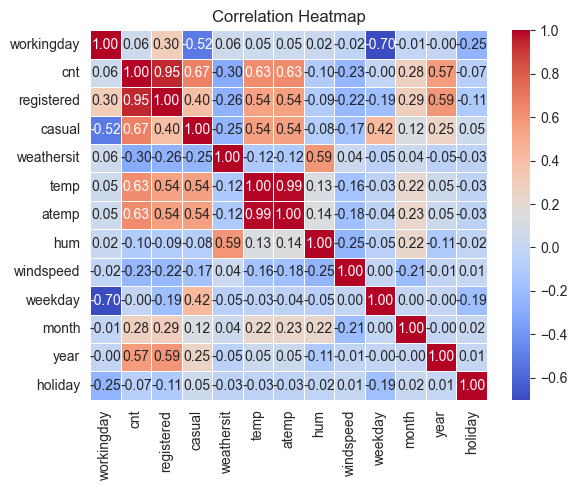

In [7]:
sns.heatmap(day.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


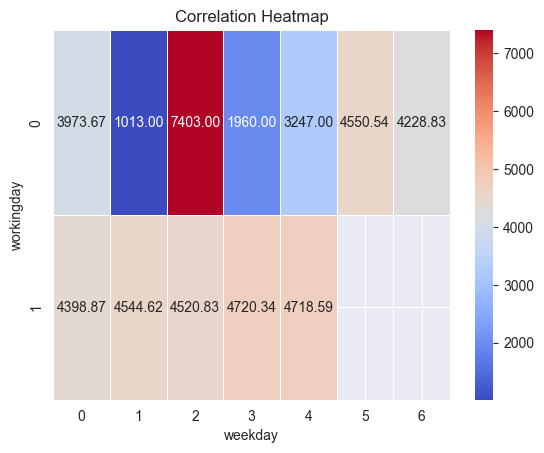

In [8]:
pivot = day.pivot_table(values='cnt', index='workingday', columns='weekday', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f',linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
#why is there a huge spike on wensday on non-workdays???

In [9]:
# plt.figure(figsize=(10,5))
#
# print("total holidays: ",  ((day['holiday'] == 1) & (day['weekday'] < 5)).sum())
entry = ((day['holiday'] == 1) & (day['weekday'] == 2))
print(day[entry].index[0])
# sns.barplot(data=holidays, x='weekday', y='cnt', hue='weekday',palette='pastel')




551


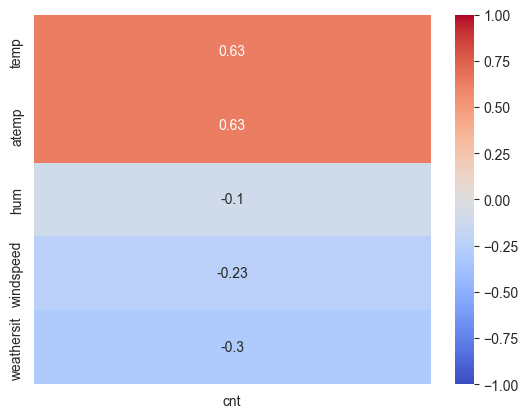

In [10]:
weather = day[['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'cnt']]
corr = weather.corr()
corr_cpy = corr[['cnt']].drop('cnt')
sns.heatmap(corr_cpy, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

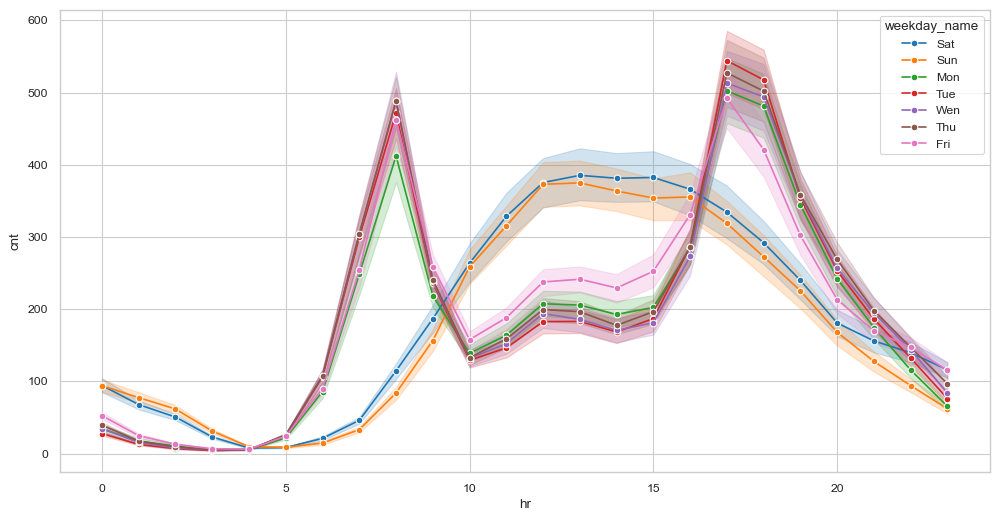

In [11]:
sns.set_theme('paper', 'whitegrid')
plt.figure(figsize=(12,6)) # for some reason this doesnt effect the relplot

hour = pd.read_csv('data/hour.csv')
weekday_names = ['Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat']
hour['weekday_name'] = hour['weekday'].map(lambda x: weekday_names[x])
#hour_pivot = hour.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')
#sns.heatmap(hour_pivot, annot=True, cmap='coolwarm', fmt='.1f',vmin=-1, vmax=1)
sns.lineplot(hour, x='hr', y='cnt', hue='weekday_name', marker='o', palette='tab10')
plt.show()


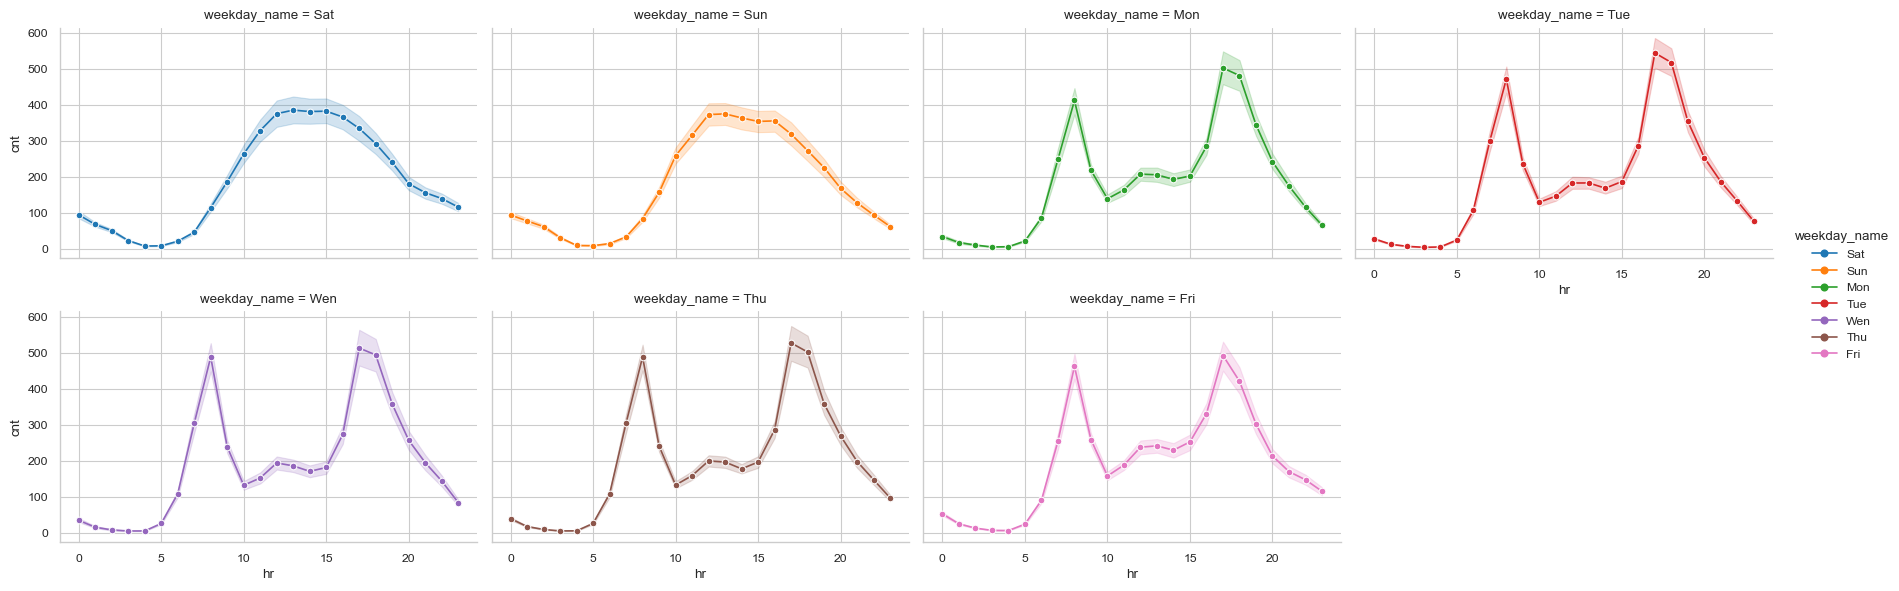

In [12]:
sns.relplot(data=hour, x='hr', y='cnt', hue='weekday_name', palette='tab10', marker='o', kind='line', col='weekday_name', col_wrap=4, height=3, aspect=1.5)
plt.show()

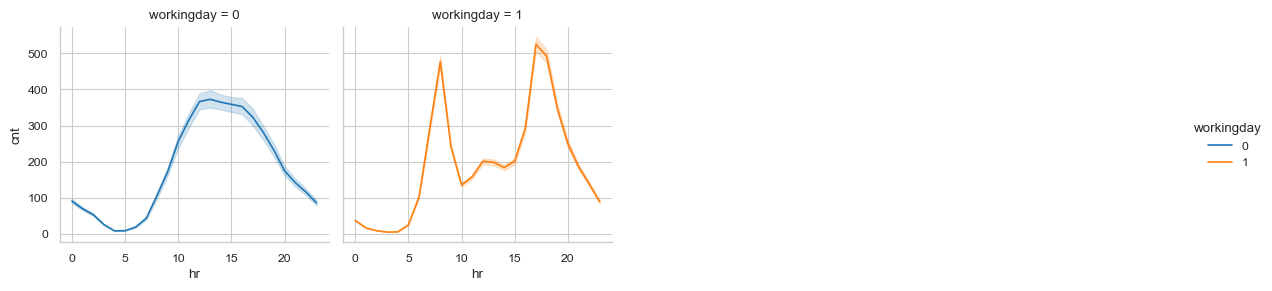

In [13]:
sns.relplot(data=hour, x='hr', y='cnt', hue='workingday', palette='tab10', kind='line', col='workingday', col_wrap=4, height=3)

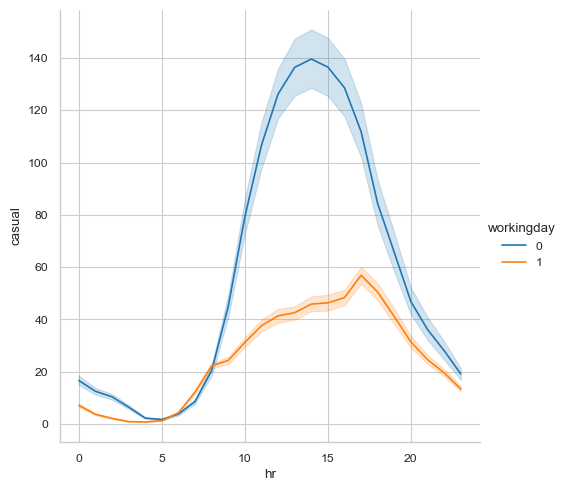

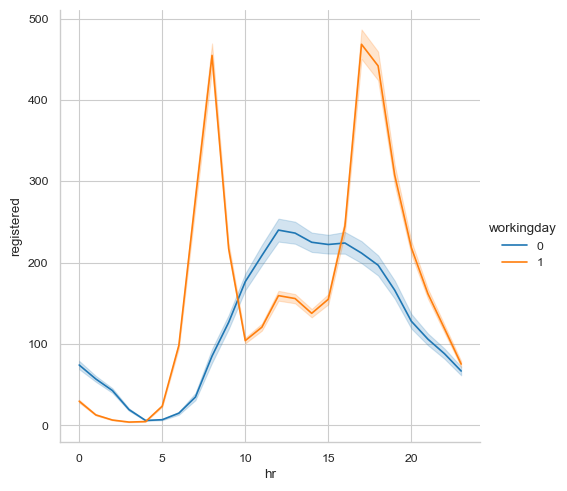

In [14]:
sns.relplot(data=hour, x='hr', y='casual', hue='workingday', palette='tab10', kind='line')
plt.show()
sns.relplot(data=hour, x='hr', y='registered', hue='workingday', palette='tab10', kind='line')

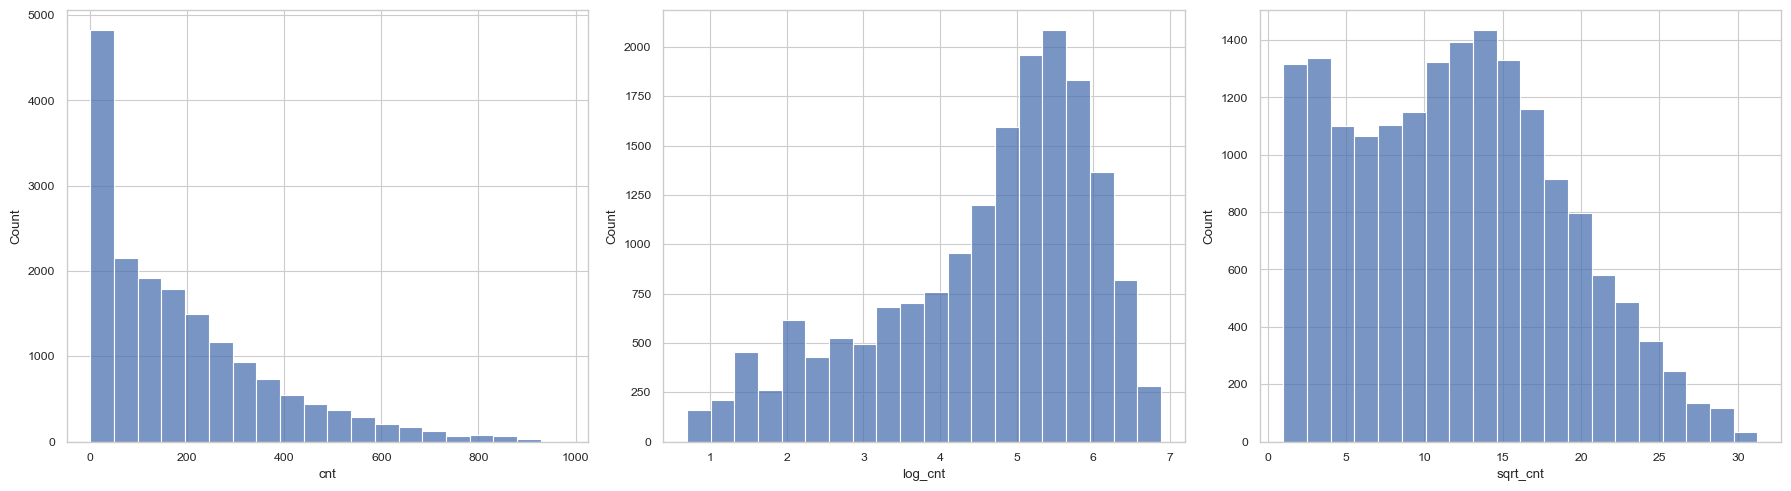

In [15]:
hour['log_cnt'] = np.log1p(hour['cnt'])
hour['sqrt_cnt'] = np.sqrt(hour['cnt'])  # More gentle than log


fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(data=hour['cnt'], bins=20, ax=ax[0])
sns.histplot(data=hour['log_cnt'], bins=20, ax=ax[1])
sns.histplot(data=hour['sqrt_cnt'], bins=20, ax=ax[2])
plt.tight_layout()
plt.show()

<Axes: xlabel='sqrt_cnt'>

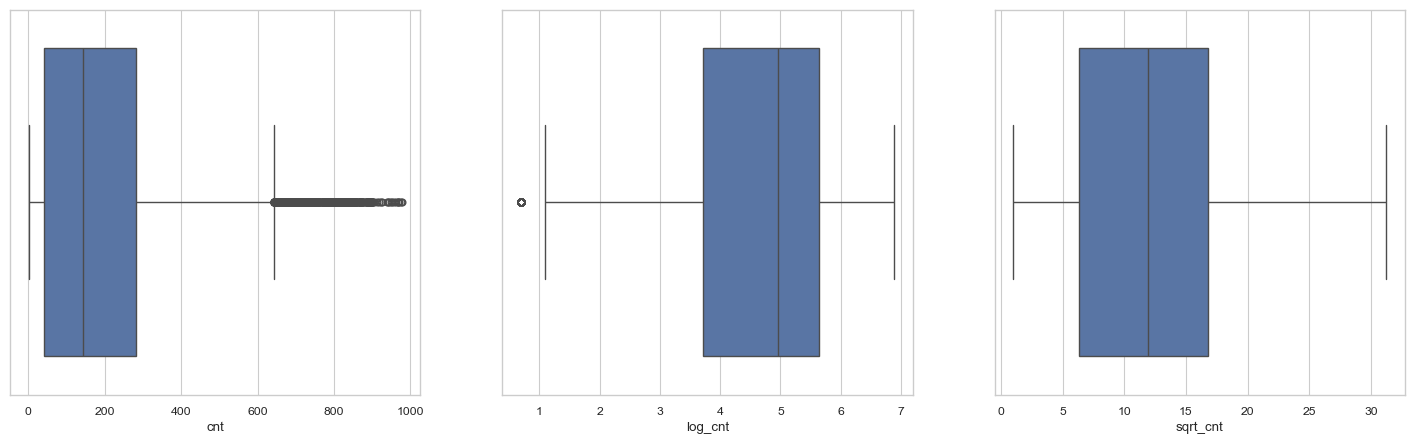

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.boxplot(x=hour['cnt'], ax=ax[0])
sns.boxplot(x=hour['log_cnt'], ax=ax[1])
sns.boxplot(x=hour['sqrt_cnt'], ax=ax[2])

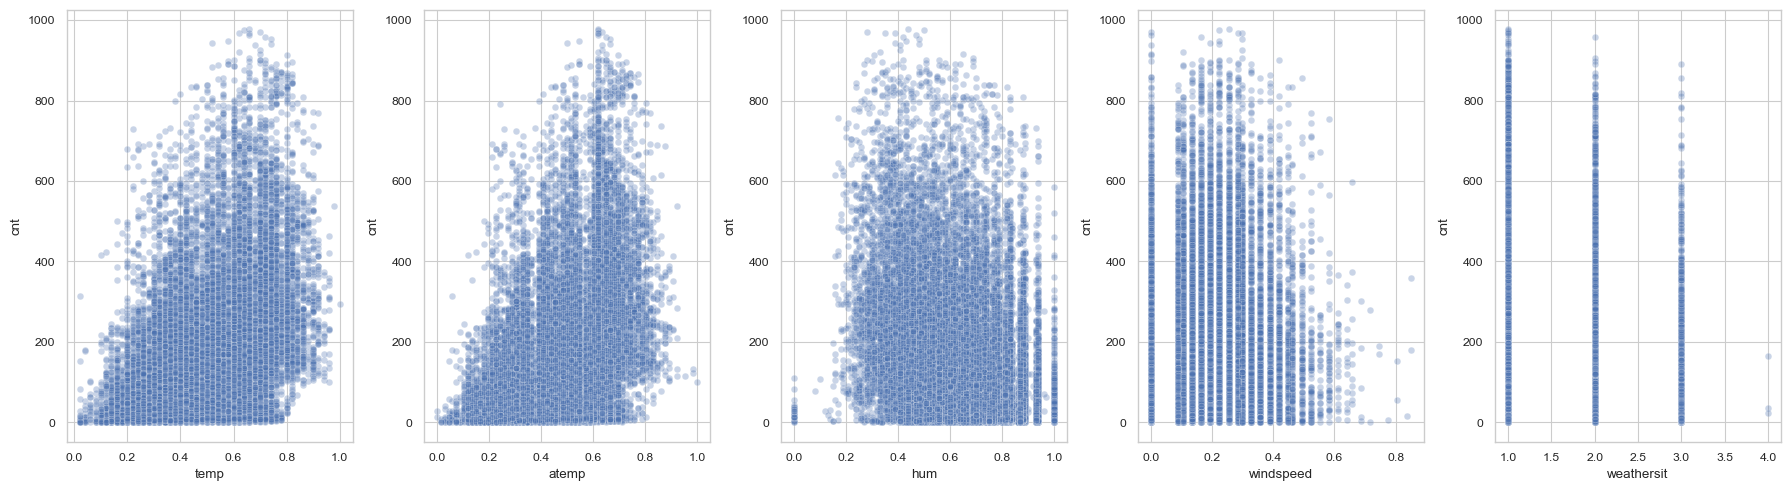

In [17]:
#temp_group = hour.groupby('temp')[['cnt', 'atemp', 'hum', 'windspeed', 'weathersit']].mean().reset_index()
#sns.lineplot(data=temp_group, x='temp', y='cnt')
#sns.relplot(data=hour, x='temp', y='cnt', kind='line')
#sns.pairplot(data=hour[['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'cnt']])
features = ['temp', 'atemp','hum', 'windspeed', 'weathersit']
target = 'cnt'
fig, ax = plt.subplots(1, len(features), figsize=(18,5))
for ax, feature in zip(ax, features):
    sns.scatterplot(data=hour, x=feature, y=target, ax=ax, alpha=0.3)
plt.tight_layout()
plt.show()